# Introduction

The Boston housing market is highly competitive, and you want to be the best real estate agent in the area. To compete with your peers, you decide to leverage a few basic machine learning concepts to assist you and a client with finding the best selling price for their home. Luckily, you’ve come across the Boston Housing dataset which contains aggregated data on various features for houses in Greater Boston communities, including the median value of homes for each of those areas. Your task is to build an optimal model based on a statistical analysis with the tools available. This model will then used to estimate the best selling price for your client’s home.

# Tutorial content
In this tutorial, you will apply basic machine learning concepts on data collected for housing prices in the Boston, Massachusetts area to predict the selling price of a new home. You will first explore the data to obtain important features and descriptive statistics about the dataset. Next, you will properly split the data into testing and training subsets, and determine a suitable performance metric for this problem. You will then analyze performance graphs for a learning algorithm with varying parameters and training set sizes. This will enable you to pick the optimal model that best generalizes for unseen data. Finally, you will test this optimal model on a new sample and compare the predicted selling price to your statistics.


# Highlight
This tutorial is designed to get you acquainted to working with datasets in Python and applying basic machine learning techniques using NumPy and Scikit-Learn. Before being expected to use many of the available algorithms in the sklearn library, it will be helpful to first practice analyzing and interpreting the performance of your model.

Things you will learn by completing this tutorial:
- How to use NumPy to investigate the latent features of a dataset.
- How to analyze various learning performance plots for variance and bias.
- How to determine the best-guess model for predictions from unseen data.
- How to evaluate a model's performance on unseen data using previous data.


# Software and Libraries
This project uses the following software and Python libraries:

- Python 2.7
- NumPy
- pandas
- scikit-learn
- matplotlib

You will also need to have software installed to run and execute a Jupyter Notebook.

If you do not have Python installed yet, it is highly recommended that you install the Anaconda distribution of Python, which already has the above packages and more included. Make sure that you select the Python 2.7 installer and not the Python 3.x installer.

## Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [79]:
# Importing a few necessary libraries
import numpy as np
import matplotlib.pyplot as pl
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor

# Make matplotlib show our plots inline (nicely formatted in the notebook)
%matplotlib inline

# Create our client's feature set for which we will be predicting a selling price
CLIENT_FEATURES = [[11.95, 0.00, 18.100, 0, 0.6590, 5.6090, 90.00, 1.385, 24, 680.0, 20.20, 332.09, 12.13]]

# Load the Boston Housing dataset into the city_data variable
city_data = datasets.load_boston()

# Initialize the housing prices and housing features
housing_prices = city_data.target
housing_features = city_data.data

print "Boston Housing dataset loaded successfully!"

Boston Housing dataset loaded successfully!


In [80]:
print CLIENT_FEATURES

chosen_features = ['RM', 'DIS','LSTAT']
features = city_data.feature_names.tolist()
for feature in chosen_features:
    index = features.index(feature)
    print CLIENT_FEATURES[0][index]

[[11.95, 0.0, 18.1, 0, 0.659, 5.609, 90.0, 1.385, 24, 680.0, 20.2, 332.09, 12.13]]
5.609
1.385
12.13


### Implementation: Calculate Statistics
For your very first coding implementation, you will calculate descriptive statistics about the Boston housing prices. Since `numpy` has already been imported for you, use this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, you will need to implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MEDV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

In [81]:
# TODO: Minimum price of the data
minimum_price = np.min(prices)

# TODO: Maximum price of the data
maximum_price = np.max(prices)

# TODO: Mean price of the data
mean_price = np.mean(prices)

# TODO: Median price of the data
median_price = np.median(prices)

# TODO: Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print "Statistics for Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


----

## Developing a Model
In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Split Data and Define a Performance Metric
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score`to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

R2 = { ( 1 / N ) Σ [ (xi - x) (yi - y) ] / (σx * σy ) }2

Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |
*Would you consider this model to have successfully captured the variation of the target variable? Why or why not?* 

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [82]:
# Put any import statements you need for this code block here
import math
from sklearn.cross_validation import train_test_split

def shuffle_split_data(X, y):
    """ Shuffles and splits data into 70% training and 30% testing subsets,
        then returns the training and testing subsets. """

    # Shuffle and split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, train_size = 0.7, random_state = 42)

    # Return the training and testing data subsets
    return X_train, X_test, y_train, y_test

def r2_score(y_true, y_pred):
    # "sample mean", i.e. mean of true vals
    y_bar = sum(y_true)/len(y_true)

    numerator = sum([math.pow(y_t - y_p, 2) 
                     for y_t, y_p in zip(y_true, y_pred)])

    denominator = sum([math.pow(y_t - y_bar, 2) 
                       for y_t in y_true])

    # r2_score
    coeff_of_determination = 1 - (numerator / denominator)  
    return coeff_of_determination

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between
    # 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score



In [35]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], 
                           [2.5, 0.0, 2.1, 7.8, 5.3])
print ("Model has a coefficient of determination, R^2, of {:.3f}."
       .format(score))
X_train, X_test, y_train, y_test = shuffle_split_data(housing_features, housing_prices)
print X_train.shape

Model has a coefficient of determination, R^2, of 0.923.
(354, 13)


----

### Implementation: Fitting a model
In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html) from `sklearn.grid_search` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.
  

*What is the k-fold cross-validation training technique? What benefit does this technique provide for grid search when optimizing a model?*  
**Hint:** Much like the reasoning behind having a testing set, what could go wrong with using grid search without a cross-validated set?

In [ ]:
# Put any import statements you need for this code block
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import ShuffleSplit

def fit_model(X, y):
    """ Tunes a decision tree regressor model using GridSearchCV on the input data X 
        and target labels y and returns this optimal model. """

    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor()
    if X.shape == y.shape:
    # Set up the parameters we wish to tune
         parameters = {'max_depth':(1,2,3,4,5,6,7,8,9,10),'max_features':(1,2,3),'min_samples_split':(2,3,4),'min_samples_leaf':(1,2,3)}
    # Make an appropriate scoring function
    scoring_function = make_scorer(mean_squared_error, greater_is_better = False)

    # Make the GridSearchCV object
    cv = ShuffleSplit(y.shape[0], n_iter = 100, test_size = .3, train_size = .7)
    reg = GridSearchCV(regressor, parameters, scoring_function, verbose = 1, n_jobs = 2, cv = cv)

    # Fit the learner to the data to obtain the optimal model with tuned parameters
    reg.fit(X, y)

    # Return the optimal model
    return reg.best_estimator_
try:
    reg = fit_model(housing_features, housing_prices)
    print "Successfully fit a model!"
    print reg
    print reg.feature_importances_ 
except:
    print "Something went wrong with fitting a model."

In [64]:
# Test fit_model on entire dataset
reg = fit_model(housing_features, housing_prices)
print reg
print reg.feature_importances_ 
print "Final model has an optimal max_depth parameter of", reg.get_params()['max_depth']

Fitting 100 folds for each of 270 candidates, totalling 27000 fits


[Parallel(n_jobs=2)]: Done 3148 tasks      | elapsed:    4.5s
[Parallel(n_jobs=2)]: Done 15148 tasks      | elapsed:   21.4s


DecisionTreeRegressor(criterion='mse', max_depth=9, max_features=3,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=2, min_samples_split=4,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')
[ 0.0309262   0.00103925  0.00474165  0.00118589  0.08685807  0.59602989
  0.02114639  0.01973616  0.00347508  0.01106492  0.00916859  0.00524966
  0.20937824]
Final model has an optimal max_depth parameter of 9


[Parallel(n_jobs=2)]: Done 27000 out of 27000 | elapsed:   39.5s finished


### Implementation: Analyzing model performace
In this third section of the project, you'll take a look at several models' learning and testing error rates on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `max_depth` parameter on the full training set to observe how model complexity affects learning and testing errors. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.


### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded reigon of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

In [89]:
import matplotlib.pyplot as pl
import numpy as np
import sklearn.learning_curve as curves
from sklearn.tree import DecisionTreeRegressor
from sklearn.cross_validation import ShuffleSplit, train_test_split
def ModelLearning(X, y):
    """ Calculates the performance of several models with varying sizes of training data.
        The learning and testing scores for each model are then plotted. """
    
    # Create 10 cross-validation sets for training and testing
    cv = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.2, random_state = 0)

    # Generate the training set sizes increasing by 50
    train_sizes = np.rint(np.linspace(1, X.shape[0]*0.8 - 1, 9))
    train_sizes = train_sizes.astype(int)

    # Create the figure window
    fig = pl.figure(figsize=(10,7))

    # Create three different models based on max_depth
    for k, depth in enumerate([1,3,6,10]):
        
        # Create a Decision tree regressor at max_depth = depth
        regressor = DecisionTreeRegressor(max_depth = depth)

        # Calculate the training and testing scores
        sizes, train_scores, test_scores = curves.learning_curve(regressor, X, y, \
            cv = cv, train_sizes = train_sizes, scoring = 'r2')
        
        # Find the mean and standard deviation for smoothing
        train_std = np.std(train_scores, axis = 1)
        train_mean = np.mean(train_scores, axis = 1)
        test_std = np.std(test_scores, axis = 1)
        test_mean = np.mean(test_scores, axis = 1)

        # Subplot the learning curve 
        ax = fig.add_subplot(2, 2, k+1)
        ax.plot(sizes, train_mean, 'o-', color = 'r', label = 'Training Score')
        ax.plot(sizes, test_mean, 'o-', color = 'g', label = 'Testing Score')
        ax.fill_between(sizes, train_mean - train_std, \
            train_mean + train_std, alpha = 0.15, color = 'r')
        ax.fill_between(sizes, test_mean - test_std, \
            test_mean + test_std, alpha = 0.15, color = 'g')
        
        # Labels
        ax.set_title('max_depth = %s'%(depth))
        ax.set_xlabel('Number of Training Points')
        ax.set_ylabel('Score')
        ax.set_xlim([0, X.shape[0]*0.8])
        ax.set_ylim([-0.05, 1.05])
    
    # Visual aesthetics
    ax.legend(bbox_to_anchor=(1.05, 2.05), loc='lower left', borderaxespad = 0.)
    fig.suptitle('Decision Tree Regressor Learning Performances', fontsize = 16, y = 1.03)
    fig.tight_layout()
    fig.show()

### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

Run the code cell below and use this graph to answer the following two questions.

In [90]:
def ModelComplexity(X, y):
    """ Calculates the performance of the model as model complexity increases.
        The learning and testing errors rates are then plotted. """
    
    # Create 10 cross-validation sets for training and testing
    size = 0.2
    iterms = 10
    inputtype = X.shape[0]
    cv = ShuffleSplit(inputtype, n_iter = iterms, test_size = size, random_state = 0)

    # Vary the max_depth parameter from 1 to 10
    max_depth = np.arange(1,11)
    
    taye = 'r2'
    # Calculate the training and testing scores
    train_scores, test_scores = curves.validation_curve(DecisionTreeRegressor(), X, y, \
        param_name = "max_depth", param_range = max_depth, cv = cv, scoring = taye)

    # Find the mean and standard deviation for smoothing
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Plot the validation curve
    pl.figure(figsize=(7, 5))
    a = 0.15
    pl.title('Decision Tree Regressor Complexity Performance')
    pl.plot(max_depth, train_mean, 'o-', color = 'r', label = 'Training Score')
    pl.plot(max_depth, test_mean, 'o-', color = 'g', label = 'Validation Score')
    pl.fill_between(max_depth, train_mean - train_std, \
        train_mean + train_std, alpha =a, color = 'r')
    pl.fill_between(max_depth, test_mean - test_std, \
        test_mean + test_std, alpha = a, color = 'g')
    
    # Visual aesthetics
    pl.legend(loc = 'lower right')
    pl.xlabel('Maximum Depth')
    pl.ylabel('Score')
    pl.ylim([-0.05,1.05])
    pl.show()


def PredictTrials(X, y, fitter, data):
    """ Performs trials of fitting and predicting data. """

    # Store the predicted prices
    prices = []

    for k in range(10):
        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(X, y, \
            test_size = 0.2, random_state = k)
        
        # Fit the data
        reg = fitter(X_train, y_train)
        pred = 0
        
        # Make a prediction
        pred = reg.predict([data[0]])
        pred = pred[0]
        if pred!=0:
            prices.append(pred)
        
        # Result
        print "Trial {}: ${:,.2f}".format(k+1, pred)

In [91]:
def PredictTrials(X, y, fitter, data):
    """ Performs trials of fitting and predicting data. """

    # Store the predicted prices
    prices = []

    for k in range(10):
        # Split the data
        size = 0.2
        state = k
        X_train, X_test, y_train, y_test = train_test_split(X, y, \
            test_size = size, random_state = state)
        
        # Fit the data
        reg = fitter(X_train, y_train)
        
        # Make a prediction
        pred = reg.predict([data[0]])[0]
        pred = pred[0]
        prices.append(pred)
        
        # Result
        print "Trial {}: ${:,.2f}".format(k+1, pred)

    # Display price range
    print "\nRange in prices: ${:,.2f}".format(max(prices) - min(prices))

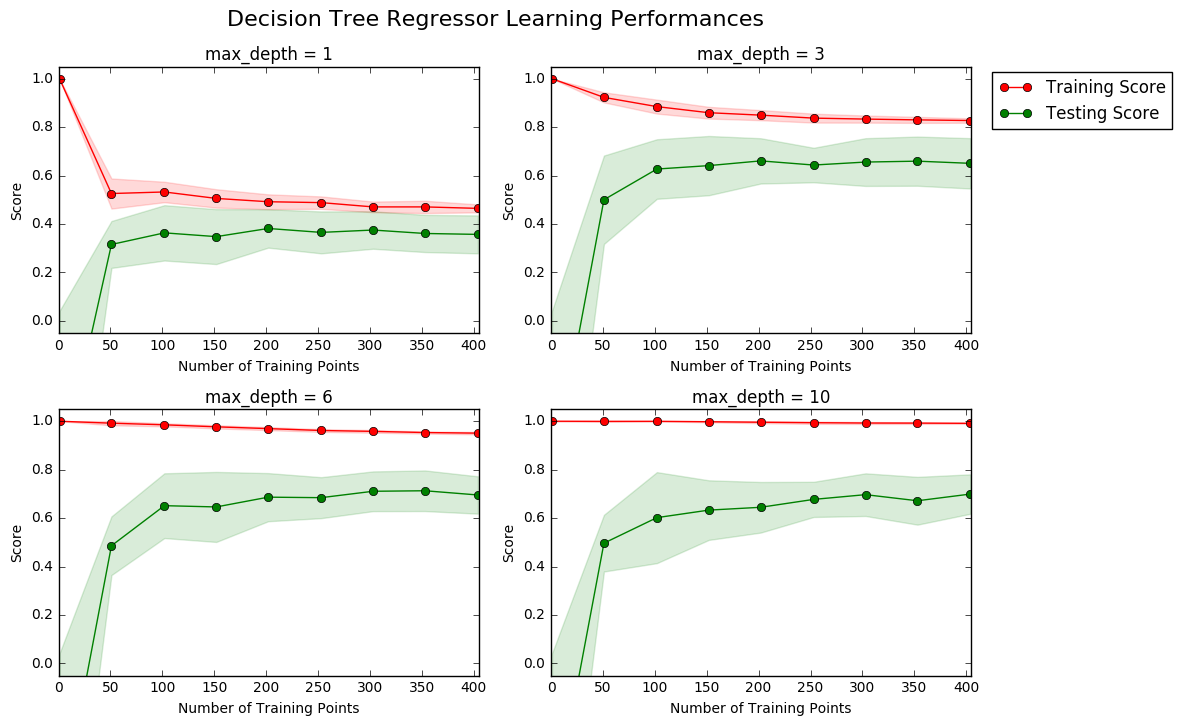

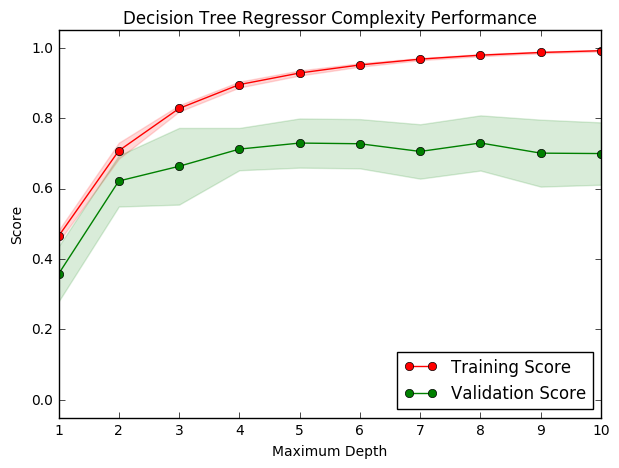

In [92]:
ModelLearning(housing_features,housing_prices)
ModelComplexity(housing_features,housing_prices)

### Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |



*With your parameter-tuned model, what is the best selling price for your client's home? How does this selling price compare to the basic statistics you calculated on the dataset?*  

**Hint: ** Run the code block below to have your parameter-tuned model make a prediction on the client's home.

In [77]:
from sklearn.neighbors import NearestNeighbors
num_neighbors=5

import warnings
warnings.filterwarnings("ignore")
# Produce a matrix for client data
client_data = [[5, 34, 15], # Client 1
               [4, 55, 22], # Client 2
               [8, 7, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print "Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price)


def nearest_neighbor_price(x):
    # x is your vector and X is the data set
    def find_nearest_neighbor_indexes(x, housing_features):
        neigh = NearestNeighbors(num_neighbors)
        neigh.fit(housing_features)
        distance, indexes = neigh.kneighbors( x )
        distance = distance
        indexes = indexes
        return indexes
    
    indexes = find_nearest_neighbor_indexes(x, housing_features)
    sum_prices = []
    length = len(indexes)
    for i in indexes:
        sum_prices.append(prices[i])
    neighbor_avg = np.mean(sum_prices)
    return neighbor_avg

#print nearest_neighbor_price( [4, 55, 22])
index = 0  
for i in CLIENT_FEATURES:
    val=nearest_neighbor_price(i)
    index += 1
    print ("The predicted {} nearest neighbors price for home {} is: ${:,.2f}"
           .format(num_neighbors,index, val))  

The predicted 5 nearest neighbors price for home 1 is: $255,780.00


/usr/local/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


**Answer: **

Recommendation for each client will be based on these predictions from the model:
- Predicted selling price for Client 1's home: 
    - __$344,400.00__

- Predicted selling price for Client 2's home:
    - __$237,478.72__

- Predicted selling price for Client 3's home:
    - __$931,636.36__

Based on the summary statistics that follow, these predictions seem reasonable:

- Minimum price: $105,000.00

- Maximum price: $1,024,800.00

- Mean price: $454,342.94

- Median price $438,900.00

- Standard deviation of prices: $165,171.13